<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [128]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [129]:

!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-07-19 10:55:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2022-07-19 10:55:50 (155 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [130]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [131]:
df.shape

(346, 10)

### Convert to date time object


In [132]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [133]:
# df['loan_status'].value_counts()
df['Principal'].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [134]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

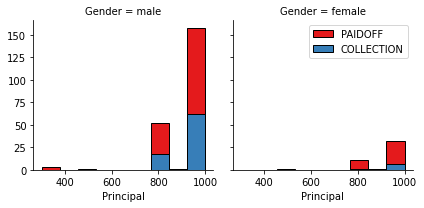

In [135]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

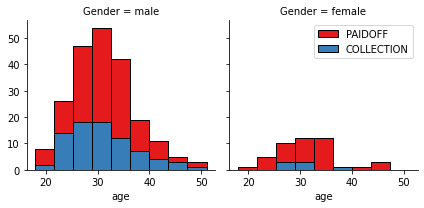

In [136]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


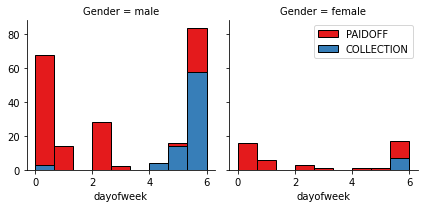

In [137]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [138]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [139]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [140]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [141]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [142]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [143]:

fset0 = df[['Principal','terms','age','Gender','weekend']]
fset0 = pd.concat([fset0, pd.get_dummies(df['education'])], axis=1)
fset0.drop(['Master or Above'], axis = 1,inplace=True)
fset0.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [144]:
X = fset0
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [145]:
y = df['loan_status']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [146]:
# Split dataset into training and testing sets before normalization
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
# X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

# X_train[0:5]

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# Sarit's Final Assignment: Loan Status Classifier

From this header onward are the work that I'm submitting to IBM's Machine Learning with Python.

First, let's import all the evaluation metric modules.

In [147]:
# Import Evaluation Metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


Firstly, I *DON'T* think that `Principal` and `Education` should be included in this particular classifier as they are ineffective predictor of `loan_status`.

As you can see below in the histogram figure, the majority of the observed `Principal` values are either 1000 or 800—with rest having count of less than 4, and probabilities of the debt being `PAIDOFF` are rather proportionately distributed across both of those values, symmetrically between male and female as well.

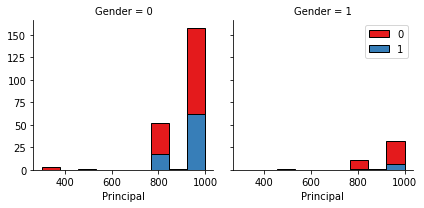


Principal Counts:
1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64


In [148]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

print(f"\nPrincipal Counts:\n{df['Principal'].value_counts()}")

The variable `Education` has the same issue as `Principal` in the sense that it doesn't give us any information. With the exception of `Master or Above`—which is also NOT included in the original feature set `Feature` originally preprocessed, probabilities of `loan_status` are proportionately distributed to all `Education` labels, ~75% being `PAIDOFF` and ~25% being `COLLECTION`.

In [149]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

Before going any further, there are some changes to be made to the dataframe.

First, let's make some changes to the dataframe. I want to change `dayofweek` to `effective_dayofweek` to so I can add a new column of `due_dayofweek`. If there is a significant difference between whether people pay their debt on time based on the day they got their money, I think the opposite should also be true and even more starkly distinguishable.

It just makes more sense if people were to miss their due if they have to pay it during a weekend rather than if they had received their loan in a weekend. On that note, we should also change `weekend` to `effective_weekend` and add `due_weekend` column as well.

Let's another new columns for `due_month`. My hypothesis is that the purchasing patterns during annual sale periods and/or national holidays could impact people's capacity to pay off their debt in due time.

In [150]:
# Rename `dayofweek` column to `effective_dayofweek` and add new column `due_dayofweek`
df.rename(columns={'dayofweek': 'effective_dayofweek'}, inplace=True)
df['due_dayofweek'] = df['due_date'].dt.dayofweek

# Rename `weekend` column to `effective_weekend` and add new column `due_weekend`
df.rename(columns={'weekend': 'effective_weekend'}, inplace=True)
df['due_weekend'] = df['due_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# Add `due_month` column
df['due_month'] = df['due_date'].dt.month

Judging from the evaluation of the feature set `Feature` previously preprocessed and provided, I suspect that including too many features into these models leads to higher rate of error.

I will to comb-through all independent variables to find good predictors, then intuitively formulate new feature sets to train the models.


In [151]:
def print_hist_grid_config(vars):
    """Prints out configuration codes for plotting histograms
    using DataFrame column names passed in as argument"""

    for n, var in enumerate(vars):
        print(f"""
# {var}
bins{n+1} = np.linspace(df.{var}.min(), df.{var}.max(), 10)
g{n+1} = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g{n+1}.map(plt.hist, '{var}', bins=bins{n+1}, ec='k')
g{n+1}.axes[-1].legend()
        """)

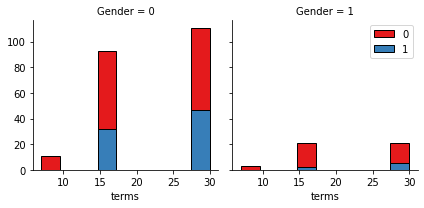

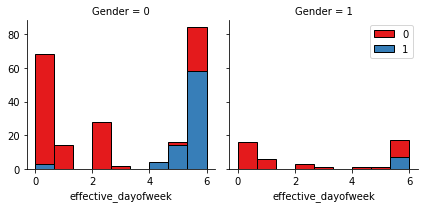

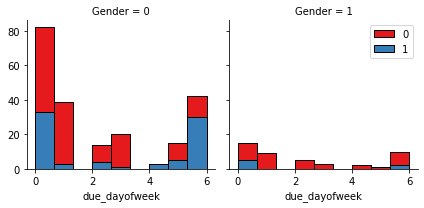

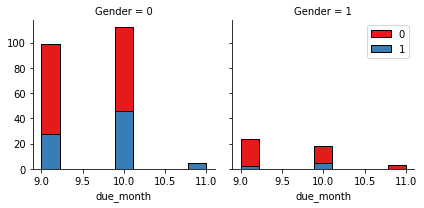

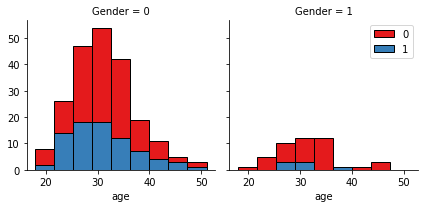

In [152]:
indp_vars = ['terms', 'effective_dayofweek', 'due_dayofweek', 'due_month', 'age']

# print_hist_grid_config(indp_vars)

# terms
bins1 = np.linspace(df.terms.min(), df.terms.max(), 10)
g1 = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g1.map(plt.hist, 'terms', bins=bins1, ec='k')
g1.axes[-1].legend()
        

# effective_dayofweek
bins2 = np.linspace(df.effective_dayofweek.min(), df.effective_dayofweek.max(), 10)
g2 = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g2.map(plt.hist, 'effective_dayofweek', bins=bins2, ec='k')
g2.axes[-1].legend()
        

# due_dayofweek
bins3 = np.linspace(df.due_dayofweek.min(), df.due_dayofweek.max(), 10)
g3 = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g3.map(plt.hist, 'due_dayofweek', bins=bins3, ec='k')
g3.axes[-1].legend()
        

# due_month
bins4 = np.linspace(df.due_month.min(), df.due_month.max(), 10)
g4 = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g4.map(plt.hist, 'due_month', bins=bins4, ec='k')
g4.axes[-1].legend()
        

# age
bins5 = np.linspace(df.age.min(), df.age.max(), 10)
g5 = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g5.map(plt.hist, 'age', bins=bins5, ec='k')
g5.axes[-1].legend()

plt.show()

Let's test for a model trained with a featureset consisted of age, effective dayofweek, effective weekend, due dayofweek, due weekend

In [153]:

# fset1 = ['age', 'Gender', 'effective_dayofweek', 'effective_weekend', 'due_dayofweek', 'due_weekend']

FEATURES = fset0


In [154]:
# Assign feature set to constant
X = FEATURES

# Replace target variable type from categorical to binary labels
y = df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0, 1]).values

# Split training and testing sets (test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Normalize training and testing feature sets
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

X_train[0:5]


array([[ 0.56081126, -0.9677917 ,  0.69858179, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126,  0.9437816 , -0.81959596, -0.40565621,  0.85146932,
        -0.40565621,  1.10716144, -0.82639387],
       [ 0.56081126,  0.9437816 ,  0.02383612, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126, -0.9677917 , -0.98828237, -0.40565621,  0.85146932,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126,  0.9437816 , -0.48222312, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674]])

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [155]:
from sklearn.neighbors import KNeighborsClassifier


In [156]:
Ks = 20

knn_mean_accuracy = np.zeros(Ks-1)
knn_mean_jacscore = np.zeros(Ks-1)
knn_mean_f1score = np.zeros(Ks-1)

k_initial_eval = {}

for k in range(1, Ks):

    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    knn_model_pred = knn_model.predict(X_test)
    knn_mean_jacscore[k-1] = jaccard_score(y_test, knn_model_pred)
    knn_mean_f1score[k-1] = f1_score(y_test, knn_model_pred)

    k_initial_eval[k] = {}
    k_initial_eval[k]['basic_acc'] = accuracy_score(y_test, knn_model_pred)
    k_initial_eval[k]['jacscore'] = jaccard_score(y_test, knn_model_pred)
    k_initial_eval[k]['f1score'] = f1_score(y_test, knn_model_pred)

    print(f"""
    k: {k}
    
        Basic Accuracy:\t\t{k_initial_eval[k]['basic_acc']:.2f}
        Jaccard Score:\t\t{k_initial_eval[k]['jacscore']:.2f}
        F1 Score:\t\t{k_initial_eval[k]['f1score']:.2f}
    """)



    k: 1
    
        Basic Accuracy:		0.64
        Jaccard Score:		0.22
        F1 Score:		0.36
    

    k: 2
    
        Basic Accuracy:		0.76
        Jaccard Score:		0.15
        F1 Score:		0.26
    

    k: 3
    
        Basic Accuracy:		0.74
        Jaccard Score:		0.31
        F1 Score:		0.47
    

    k: 4
    
        Basic Accuracy:		0.74
        Jaccard Score:		0.14
        F1 Score:		0.25
    

    k: 5
    
        Basic Accuracy:		0.70
        Jaccard Score:		0.22
        F1 Score:		0.36
    

    k: 6
    
        Basic Accuracy:		0.79
        Jaccard Score:		0.21
        F1 Score:		0.35
    

    k: 7
    
        Basic Accuracy:		0.74
        Jaccard Score:		0.18
        F1 Score:		0.31
    

    k: 8
    
        Basic Accuracy:		0.74
        Jaccard Score:		0.10
        F1 Score:		0.18
    

    k: 9
    
        Basic Accuracy:		0.74
        Jaccard Score:		0.14
        F1 Score:		0.25
    

    k: 10
    
        Basic Accuracy:		0.76
        Jaccard Score:		0.1

In [157]:
best_knn_accuracy = knn_mean_accuracy.max()
best_k_accuracy = knn_mean_accuracy.argmax() + 1

best_knn_jacscore = knn_mean_jacscore.max()
best_k_jacscore = knn_mean_jacscore.argmax() + 1

best_knn_f1score = knn_mean_f1score.max()
best_k_f1score = knn_mean_f1score.argmax() + 1

# Re-train the model and set value of k to best_k_val
knn_model = KNeighborsClassifier(n_neighbors = best_k_accuracy).fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

initial_knn_jacscore = jaccard_score(y_test, knn_model_pred)
initial_knn_f1score = f1_score(y_test, knn_model_pred)

print(f"k-NN - Best Accuracy-prioritized K Value: {best_k_accuracy}")
print(f"\tAcc-Prior K - Accuracy Score: {best_knn_accuracy}")
print(f"\tAcc-Prior K - Initial Jaccard Score: {initial_knn_jacscore}")
print(f"\tAcc-Prior K - Initial F1 Score: {initial_knn_f1score}")

print(f"\nk-NN - Best Jaccard-prioritized K Value: {best_k_jacscore}")
print(f"\tJac-Prior K - Accuracy Score: <accuracy score with best_k_jacscore>")
print(f"\tJac-Prior K - Initial Jaccard Score: {best_knn_jacscore}")
print(f"\tJac-Prior K - Initial F1 Score: <f1 score with best_k_jacscore>")

print(f"\nk-NN - Best F1-prioritized K Value: {best_k_f1score}")
print(f"\tF1-Prior K - Accuracy Score: <accuracy score with best_k_f1score>")
print(f"\tF1-Prior K - Initial Jaccard Score: <f1 score with best_k_f1score>")
print(f"\tF1-Prior K - Initial F1 Score: {best_knn_f1score}")



k-NN - Best Accuracy-prioritized K Value: 1
	Acc-Prior K - Accuracy Score: 0.0
	Acc-Prior K - Initial Jaccard Score: 0.21875
	Acc-Prior K - Initial F1 Score: 0.35897435897435903

k-NN - Best Jaccard-prioritized K Value: 3
	Jac-Prior K - Accuracy Score: <accuracy score with best_k_jacscore>
	Jac-Prior K - Initial Jaccard Score: 0.3076923076923077
	Jac-Prior K - Initial F1 Score: <f1 score with best_k_jacscore>

k-NN - Best F1-prioritized K Value: 3
	F1-Prior K - Accuracy Score: <accuracy score with best_k_f1score>
	F1-Prior K - Initial Jaccard Score: <f1 score with best_k_f1score>
	F1-Prior K - Initial F1 Score: 0.47058823529411764


# Decision Tree


In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)


In [160]:
# In-sample Testing Block

initial_dtree_accuracy = accuracy_score(y_test, dtree_pred)
initial_dtree_jacscore = jaccard_score(y_test, dtree_pred)
initial_dtree_f1score = f1_score(y_test, dtree_pred)

print(f"""
Decision Tree

    Accuracy Score:\t\t{initial_dtree_accuracy:.2f}
    Jaccard Score:\t\t{initial_dtree_jacscore:.2f}
    F1 Score:\t\t\t{initial_dtree_f1score:.2f}
""")



Decision Tree

    Accuracy Score:		0.70
    Jaccard Score:		0.16
    F1 Score:			0.28



# Support Vector Machine


In [161]:
from sklearn import svm

In [162]:
kernel_types = ['rbf', 'sigmoid', 'linear' , 'poly']
kernel_initial_eval = {}
poly_max = 10

for kernel_type in kernel_types:

    if kernel_type == 'poly':
        for i in range(1, poly_max):

            svm_model = svm.SVC(kernel=kernel_type, degree=i)
            svm_model.fit(X_train, y_train)

            svm_model_pred = svm_model.predict(X_test)

            kernel_initial_eval[kernel_type] = {}
            kernel_initial_eval[kernel_type][i] = {}

            kernel_initial_eval[kernel_type][i]['basic_acc'] = accuracy_score(y_test, svm_model_pred)
            kernel_initial_eval[kernel_type][i]['jacscore'] = jaccard_score(y_test, svm_model_pred)
            kernel_initial_eval[kernel_type][i]['f1score'] = f1_score(y_test, svm_model_pred)

            print(f"""
            Kernel: {kernel_type} (degree={i})

                Basic Accuracy:\t\t\t{kernel_initial_eval[kernel_type][i]['basic_acc']:.2f}
                Jaccard Score:\t\t\t{kernel_initial_eval[kernel_type][i]['jacscore']:.2f}
                F1 Score:\t\t\t{kernel_initial_eval[kernel_type][i]['f1score']:.2f}

            """)

    else:

        svm_model = svm.SVC(kernel=kernel_type)
        svm_model.fit(X_train, y_train)

        svm_model_pred = svm_model.predict(X_test)

        kernel_initial_eval[kernel_type] = {}

        kernel_initial_eval[kernel_type]['basic_acc'] = accuracy_score(y_test, svm_model_pred)
        kernel_initial_eval[kernel_type]['jacscore'] = jaccard_score(y_test, svm_model_pred)
        kernel_initial_eval[kernel_type]['f1score'] = f1_score(y_test, svm_model_pred)

        print(f"""
        Kernel: {kernel_type}

            Basic Accuracy:\t\t{kernel_initial_eval[kernel_type]['basic_acc']:.2f}
            Jaccard Score:\t\t{kernel_initial_eval[kernel_type]['jacscore']:.2f}
            F1 Score:\t\t\t{kernel_initial_eval[kernel_type]['f1score']:.2f}

        """)



        Kernel: rbf

            Basic Accuracy:		0.74
            Jaccard Score:		0.18
            F1 Score:			0.31

        

        Kernel: sigmoid

            Basic Accuracy:		0.71
            Jaccard Score:		0.09
            F1 Score:			0.17

        

        Kernel: linear

            Basic Accuracy:		0.79
            Jaccard Score:		0.00
            F1 Score:			0.00

        

            Kernel: poly (degree=1)

                Basic Accuracy:			0.79
                Jaccard Score:			0.00
                F1 Score:			0.00

            

            Kernel: poly (degree=2)

                Basic Accuracy:			0.79
                Jaccard Score:			0.00
                F1 Score:			0.00

            

            Kernel: poly (degree=3)

                Basic Accuracy:			0.74
                Jaccard Score:			0.05
                F1 Score:			0.10

            

            Kernel: poly (degree=4)

                Basic Accuracy:			0.74
                Jaccard Score:			0.05
        

In [163]:
# best_svm_kernel = max(kernel_accuracy, key=kernel_accuracy.get)
# best_svm_accuracy = kernel_accuracy.get(best_svm_kernel)

# # Re-training SVM model setting kernel type as best_svm_kernel
# svm_model = svm.SVC(kernel=best_svm_kernel)
# svm_model.fit(X_train, y_train)

# svm_model_pred = svm_model.predict(X_test)

# svm_accuracy = metrics.accuracy_score(y_test, svm_model_pred)

# print(f"Best kernelling technique: '{best_svm_kernel}'")
# print(f"SVM - Accuracy Score: {svm_accuracy}")

# initial_svm_jacscore = jaccard_score(y_test, svm_model_pred)
# initial_svm_f1score = f1_score(y_test, svm_model_pred)

# print(f"SVM - Initial Jaccard Score: {initial_svm_jacscore}")
# print(f"SVM - Initial F1 Score: {initial_svm_f1score}")


# Logistic Regression


In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C_range = np.arange(0.01, 1.0, 0.24)
solver_initial_eval = {}

for solver_type in solvers:
    
    print(f"Solver: {solver_type}")
    solver_initial_eval[solver_type] = {}

    for c in C_range:

        log_reg = LogisticRegression(C=c, solver=solver_type)
        log_reg.fit(X_train, y_train)

        log_reg_pred = log_reg.predict(X_test)

        solver_initial_eval[solver_type][c] = {}

        solver_initial_eval[solver_type][c]['basic_acc'] = accuracy_score(y_test, log_reg_pred)
        solver_initial_eval[solver_type][c]['jacscore'] = jaccard_score(y_test, log_reg_pred)
        solver_initial_eval[solver_type][c]['f1score'] = f1_score(y_test, log_reg_pred)
        solver_initial_eval[solver_type][c]['logloss'] = log_loss(y_test, log_reg_pred)

        print(f"""
        C: {c}
            Basic Accuracy:\t\t{solver_initial_eval[solver_type][c]['basic_acc']:.2f}
            Jaccard Score:\t\t{solver_initial_eval[solver_type][c]['jacscore']:.2f}
            F1 Score:\t\t\t{solver_initial_eval[solver_type][c]['f1score']:.2f}
            Log Loss:\t\t\t{solver_initial_eval[solver_type][c]['logloss']:.2f}
        """)


Solver: newton-cg

        C: 0.01
            Basic Accuracy:		0.79
            Jaccard Score:		0.00
            F1 Score:			0.00
            Log Loss:			7.40
        

        C: 0.25
            Basic Accuracy:		0.77
            Jaccard Score:		0.06
            F1 Score:			0.11
            Log Loss:			7.89
        

        C: 0.49
            Basic Accuracy:		0.76
            Jaccard Score:		0.11
            F1 Score:			0.19
            Log Loss:			8.39
        

        C: 0.73
            Basic Accuracy:		0.76
            Jaccard Score:		0.11
            F1 Score:			0.19
            Log Loss:			8.39
        

        C: 0.97
            Basic Accuracy:		0.74
            Jaccard Score:		0.10
            F1 Score:			0.18
            Log Loss:			8.88
        
Solver: lbfgs

        C: 0.01
            Basic Accuracy:		0.79
            Jaccard Score:		0.00
            F1 Score:			0.00
            Log Loss:			7.40
        

        C: 0.25
            Basic Accuracy:		0.77
           

In [166]:
# best_logreg_config = {}

# for key, val in solver_initial_eval.items():
    
#     best_logreg_config[key] = {}
#     max_val = 0
    
#     for val_key, ele in zip(val.keys(), val.values()):
        
#         if ele > max_val:
#             max_val = ele
#             max_val_key = val_key
            
#     best_logreg_config[key][max_val_key] =  max_val

# # Turns out the best configuration is any solver EXCEPT 'liblinear' with C value at 0.01
# best_logreg_config

In [167]:
# log_reg = LogisticRegression(C=0.01, solver='lbfgs')
# log_reg.fit(X_train, y_train)

# log_reg_pred = log_reg.predict(X_test)
# log_reg_accuracy = metrics.accuracy_score(y_test, log_reg_pred)

# print(f"Logistic regression with accuracy of {log_reg_accuracy}, using 'lbfgs' solver with C value at 0.01")

# initial_logreg_jacscore = jaccard_score(y_test, log_reg_pred)
# initial_logreg_f1score = f1_score(y_test, log_reg_pred)

# print(f"Logistic Regression - Initial Jaccard Score: {initial_logreg_jacscore}")
# print(f"Logistic Regression - Initial F1 Score: {initial_logreg_f1score}")

# log_reg_prob = log_reg.predict_proba(X_test)
# initial_logreg_logloss = log_loss(y_test, log_reg_prob)

# print(f"Logistic Regression - Initial Log-Loss: {initial_logreg_logloss}")

# Model Evaluation using Test set


In [168]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [169]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-07-19 10:55:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-07-19 10:55:57 (946 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [170]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [171]:
# Preprocess test data in the same way of training data for relevant evaluation

# Change date format 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# Add dayofweek and weekend columns
test_df['effective_dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['effective_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# test_df['due_dayofweek'] = test_df['due_date'].dt.dayofweek
# test_df['due_weekend'] = test_df['due_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# One-hot encode Gender and education
test_df['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)

test_Feature = test_df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

# test_Feature = test_df[fset1]

X_eval = test_Feature
y_eval = test_df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0, 1])

In [172]:
# Jaccard Scores

knn_yhat = knn_model.predict(X_eval)
dtree_yhat = dtree.predict(X_eval)
svm_yhat = svm_model.predict(X_eval)
logreg_yhat = log_reg.predict(X_eval)

knn_jacscore = jaccard_score(y_eval, knn_yhat)
dtree_jacscore = jaccard_score(y_eval, dtree_yhat)
svm_jacscore = jaccard_score(y_eval, svm_yhat)
logreg_jacscore = jaccard_score(y_eval, logreg_yhat)

print(f"""Jaccard Scores:
\tk-NN Model: {knn_jacscore}
\tDecision Tree: {dtree_jacscore}
\tSupport Vector Machine: {svm_jacscore}
\tLogistic Regression: {logreg_jacscore}
""")


Jaccard Scores:
	k-NN Model: 0.3448275862068966
	Decision Tree: 0.4
	Support Vector Machine: 0.25925925925925924
	Logistic Regression: 0.0



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [173]:
# F1 Scores

knn_f1score = f1_score(y_eval, knn_yhat)
dtree_f1score = f1_score(y_eval, dtree_yhat)
svm_f1score = f1_score(y_eval, svm_yhat)
logreg_f1score = f1_score(y_eval, logreg_yhat)

print(f"""F1 Scores:
\tk-NN Model: {knn_f1score}
\tDecision Tree: {dtree_f1score}
\tSupport Vector Machine: {svm_f1score}
\tLogistic Regression: {logreg_f1score}
""")

F1 Scores:
	k-NN Model: 0.5128205128205129
	Decision Tree: 0.5714285714285714
	Support Vector Machine: 0.4117647058823529
	Logistic Regression: 0.0



In [174]:
# Log Losses

logreg_prob = log_reg.predict_proba(X_eval)

logreg_logloss = log_loss(y_eval, logreg_prob)

print(f"Log Loss of Logistic Regression: {logreg_logloss}")

Log Loss of Logistic Regression: 8.95449758386582


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [175]:
report = {
    'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
    'Jaccard': [knn_jacscore, dtree_jacscore, svm_jacscore, logreg_jacscore],
    'F1-Score': [knn_f1score, dtree_f1score, svm_f1score, logreg_f1score],
    'LogLoss': [None, None, None, logreg_logloss]
}

report_df = pd.DataFrame.from_dict(report)
report_df

,Algorithm,Jaccard,F1-Score,LogLoss
0,KNN,0.344828,0.512821,NaN
1,Decision Tree,0.400000,0.571429,NaN
2,SVM,0.259259,0.411765,NaN
3,LogisticRegression,0.000000,0.000000,8.954498


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
